<a href="https://colab.research.google.com/github/ego-alt/segmentation-from-scratch/blob/master/instance_seg/instance_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ego-alt/segmentation-from-scratch

In [3]:
%cd segmentation-from-scratch/instance_seg/

/content/segmentation-from-scratch/instance_seg


In [4]:
!unzip -o -j -q -d ./full_images /content/drive/MyDrive/MP6843_img_full.zip
!unzip -o -j -q -d ./labels /content/drive/MyDrive/MP6843_inst.zip

In [33]:
from train import Match, CellImages, InitModel, ImageTest
from torch.utils.data import DataLoader

In [34]:
lb_root, im_root = './labels', './full_images'
handler = Match(lb_root, im_root)

In [35]:
w1, labels3d = handler.main('w1', (256, 256))

In [36]:
train = CellImages(w1[0:70], labels3d[0:70])
train_loader = DataLoader(train, 
                          batch_size=5, shuffle=False, 
                          collate_fn=lambda x:list(zip(*x)))

test_loader = DataLoader(CellImages(w1[70:90], labels3d[70:90]), 
                          batch_size=5, shuffle=False,
                          collate_fn=lambda x:list(zip(*x)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


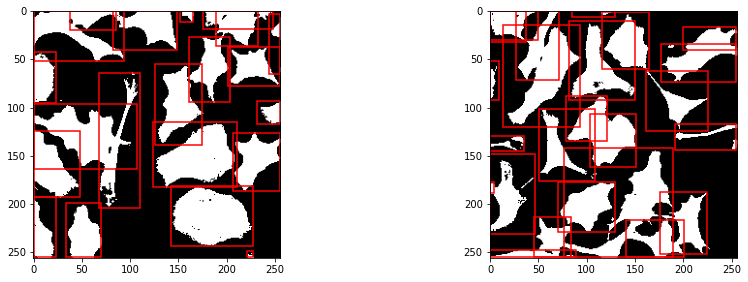

In [37]:
import torchvision
import matplotlib.pyplot as plt
from matplotlib import patches

images, labels = next(iter(train_loader))  # Batch of 5

def view(images, labels, n=2, std=1, mean=0):
    figure = plt.figure(figsize=(15,10))
    images = list(images)
    labels = list(labels)
    for i in range(n):
        out = torchvision.utils.make_grid(images[i])  
        ax = figure.add_subplot(2, 2, i + 1)
        ax.imshow(images[i].cpu().numpy().transpose((1,2,0)) * 255)
        l = labels[i]['boxes'].cpu().numpy()
        l[:,2] = l[:,2] - l[:,0]
        l[:,3] = l[:,3] - l[:,1]
        for j in range(len(l)):
            ax.add_patch(patches.Rectangle((l[j][0],l[j][1]),l[j][2],l[j][3],
                                           linewidth=1.5,
                                           edgecolor='r',
                                           facecolor='none')) 

view(images=images, labels=labels, n=2, std=1, mean=0)

In [38]:
epochs = 50
run = InitModel()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [ ]:
run.main(train_loader, test_loader, epochs=epochs)

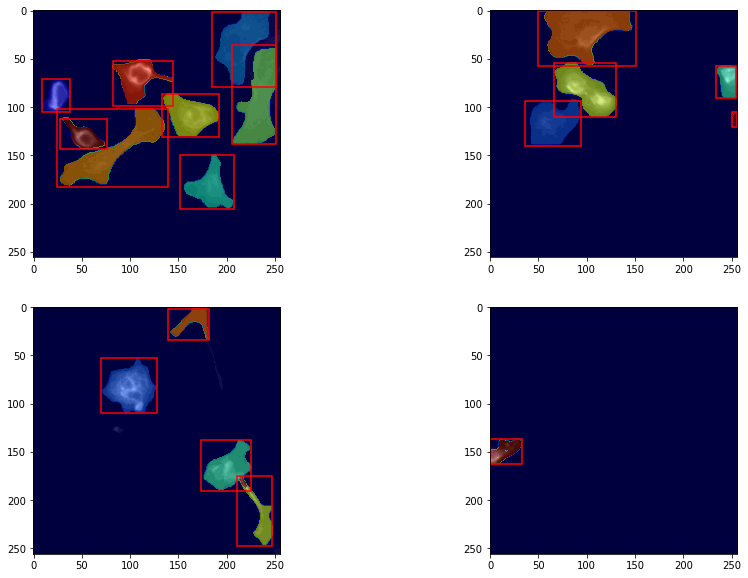

In [42]:
testone = ImageTest(w1[96:100])
testone.main(run.model, 0.90)